In [146]:
import numpy as np
import pandas as pd

In [224]:
!pip install scikit-learn==1.3.1


   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 330.3 kB/s eta 0:00:28
    --------------------------------------- 0.2/9.2 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.2 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.2 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.2 MB 8.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.2 MB 8.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.5/9.2 MB 9.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.2 MB 9.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.5/9.2 MB 9.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.1/9.2 MB 10.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.6/9.2 MB 10.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.2 MB 10.5 MB/s eta 0:00:01
   -----------

  You can safely remove it manually.


In [225]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [226]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [227]:
match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [228]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [229]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [230]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [231]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [232]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [233]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']],left_on='id', right_on='match_id')

In [234]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [235]:
teams = ['Royal Challengers Bangalore',
         'Punjab Kings',
         'Delhi Capitals',
         'Mumbai Indians',
         'Kolkata Knight Riders',
         'Rajasthan Royals',
         'Chennai Super Kings',
         'Sunrisers Hyderabad',
         'Lucknow Super Giants',
         'Gujarat Titans']

In [236]:
match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')


In [237]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]


In [238]:
match_df.shape

(1006, 22)

In [239]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [240]:
match_df.columns

Index(['match_id', 'city', 'winner', 'total_runs'], dtype='object')

In [241]:
delivery_df = match_df.merge(delivery,on='match_id')

In [242]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [243]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [244]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [245]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240042,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,3
240043,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,2
240044,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,1
240045,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,0


In [246]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])


In [247]:
delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['is_wicket'].cumsum()

In [248]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [249]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [250]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [251]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [252]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [253]:
final_df = final_df.sample(final_df.shape[0])

In [254]:
final_df.dropna(inplace=True)

In [255]:
final_df = final_df[final_df['balls_left'] != 0]

In [256]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [257]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
31448,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,51,8,4,171,6.428571,38.250000
143558,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,93,72,9,174,10.125000,7.750000
12696,Rajasthan Royals,Kings XI Punjab,Chandigarh,212,103,9,221,3.176471,12.349515
7918,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,133,114,10,143,10.000000,7.000000
204772,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,91,86,9,157,11.647059,6.348837
...,...,...,...,...,...,...,...,...,...
51721,Chennai Super Kings,Royal Challengers Bangalore,Mumbai,88,43,7,175,6.779221,12.279070
180895,Kolkata Knight Riders,Mumbai Indians,Abu Dhabi,58,66,9,155,10.777778,5.272727
1133,Kolkata Knight Riders,Deccan Chargers,Kolkata,46,45,7,110,5.120000,6.133333
119793,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,49,9,2,207,8.540541,32.666667


In [264]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [266]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [267]:
print(pipe.named_steps['step1'].transformers)


[('trf', OneHotEncoder(drop='first', sparse_output=False), ['batting_team', 'bowling_team', 'city'])]


In [268]:
print(pipe.named_steps['step2'])  
print(hasattr(pipe, 'predict_proba'))

LogisticRegression(solver='liblinear')
True


In [269]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [270]:
x_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'crr', 'rrr'],
      dtype='object')

In [271]:
y_pred = pipe.predict(X_test)

In [272]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8149977137631459

In [273]:
print(hasattr(pipe, 'predict_proba'))


True


In [274]:
pipe.predict_proba(X_test)[10]

array([0.45977176, 0.54022824])

In [275]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [276]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [277]:
# def match_progression(x_df, match_id, pipe):
#     match = x_df[x_df['match_id'] == match_id]
#     match = match[(match['ball'] == 6)]
#     temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
#     temp_df = temp_df[temp_df['balls_left'] != 0]

#     # Handle empty dataframe safely
#     if temp_df.empty:
#         print(f"No valid data for match_id {match_id}")
#         return pd.DataFrame(), None

#     result = pipe.predict_proba(temp_df)
#     temp_df['lose'] = np.round(result.T[0]*100, 1)
#     temp_df['win'] = np.round(result.T[1]*100, 1)
#     temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

#     target = temp_df['total_runs_x'].values[0]
#     runs = list(temp_df['runs_left'].values)
#     new_runs = runs[:]
#     runs.insert(0, target)
#     temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

#     wickets = list(temp_df['wickets'].values)
#     new_wickets = wickets[:]
#     new_wickets.insert(0, 10)
#     wickets.append(0)
#     w = np.array(wickets)
#     nw = np.array(new_wickets)
#     temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

#     print("Target-", target)
#     temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
#     return temp_df, target


In [278]:
temp_df,target = match_progression(delivery_df,335982,pipe)
temp_df

Target- 222


,end_of_over,runs_after_over,wickets_in_over,lose,win
129,1,4,0,94.7,5.3
136,2,5,1,97.0,3.0
142,3,2,1,98.7,1.3
149,4,5,0,98.7,1.3
155,5,8,1,99.2,0.8
161,6,2,1,99.6,0.4
167,7,3,0,99.7,0.3
175,8,9,1,99.8,0.2
181,9,3,1,99.9,0.1
189,10,9,1,99.9,0.1


Text(0.5, 1.0, 'Target-222')

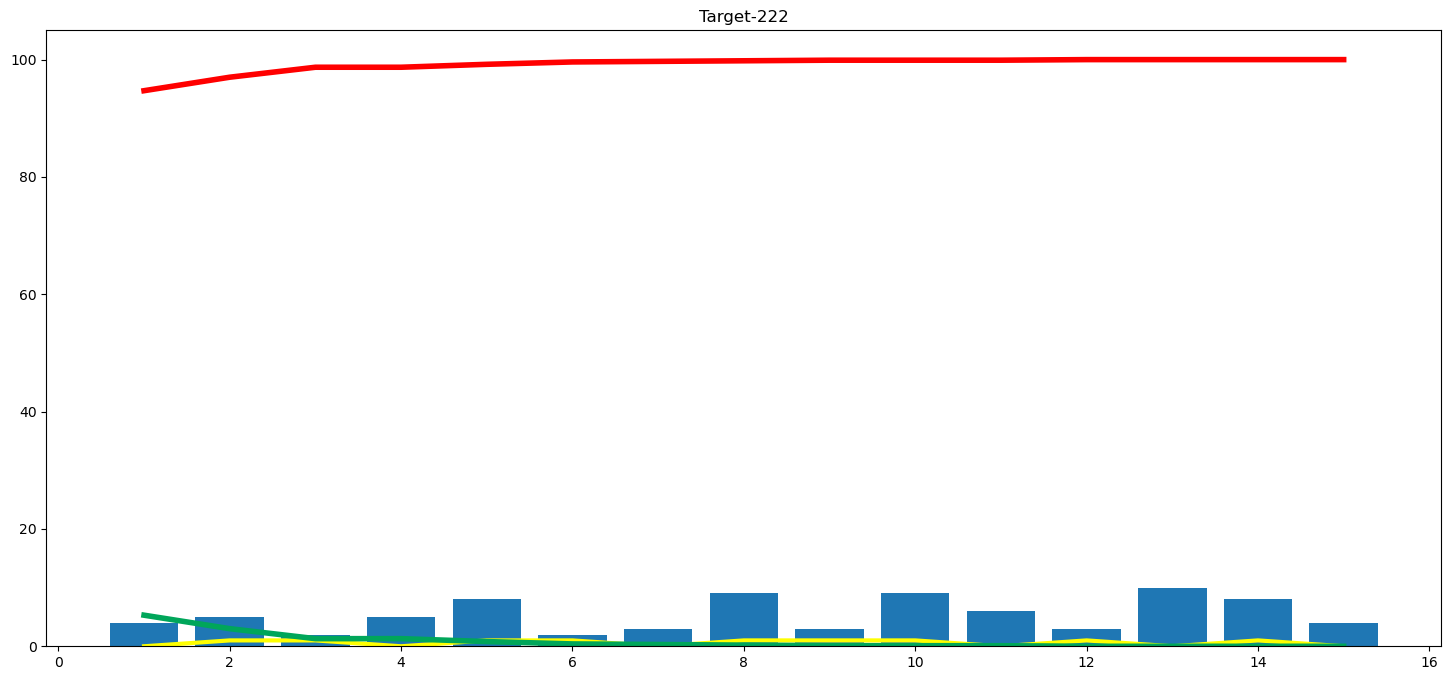

In [279]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [280]:
teams

['Royal Challengers Bangalore',
 'Punjab Kings',
 'Delhi Capitals',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [282]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [283]:
import os

# Specify the path to your file
file_path = 'pipe.pkl'

# Delete if it exists
if os.path.exists(file_path):
    os.remove(file_path)
    print("Deleted successfully ✅")
else:
    print("File does not exist ❌")


Deleted successfully ✅


In [284]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Sakshi Adhikari\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
